In [1]:
from plot_utils import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import os

In [2]:
data_path = '../data'
model_ext = 'r50'
split = 'train'

In [3]:
# read dims

class_dims_path = os.path.join(data_path, f'imagenet_{model_ext}_train', f'class_dims_{split}.pkl')
class_dims_2nn, class_dims_pca90, class_dims_pca95, class_dims_pca99 = pickle.load(open(class_dims_path.format(split=split), 'rb'))


In [4]:
accs_path_l2 = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_l2.pkl')
accs_l2 = pickle.load(open(accs_path_l2, 'rb'))

accs_path_linf = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_linf.pkl')
accs_linf = pickle.load(open(accs_path_linf, 'rb'))

accs_path_clean = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_None.pkl')
accs_clean = pickle.load(open(accs_path_clean, 'rb'))

In [19]:
df = pd.DataFrame(index=np.arange(1000),columns=['class', 'acc_clean', 'acc_l2', 'acc_linf', 'dim_2nn', 'dim_pca90', 'dim_pca95', 'dim_pca99'])

df['class'] = np.arange(1000)
df['acc_clean'] = accs_clean
df['acc_l2'] = accs_l2
df['acc_linf'] = accs_linf
df['dim_2nn'] = class_dims_2nn
df['dim_pca90'] = class_dims_pca90
df['dim_pca95'] = class_dims_pca95
df['dim_pca99'] = class_dims_pca99

In [89]:
# filter out classes with acc < 0.4
thresh_df = df[df['acc_clean'] > 0]
thresh_df = thresh_df[thresh_df['acc_l2'] > 0.1]
# acc_diff col
thresh_df['acc_diff'] = thresh_df['acc_clean'] - thresh_df['acc_l2']
# thresh_df = thresh_df[thresh_df['acc_diff'] < 1]



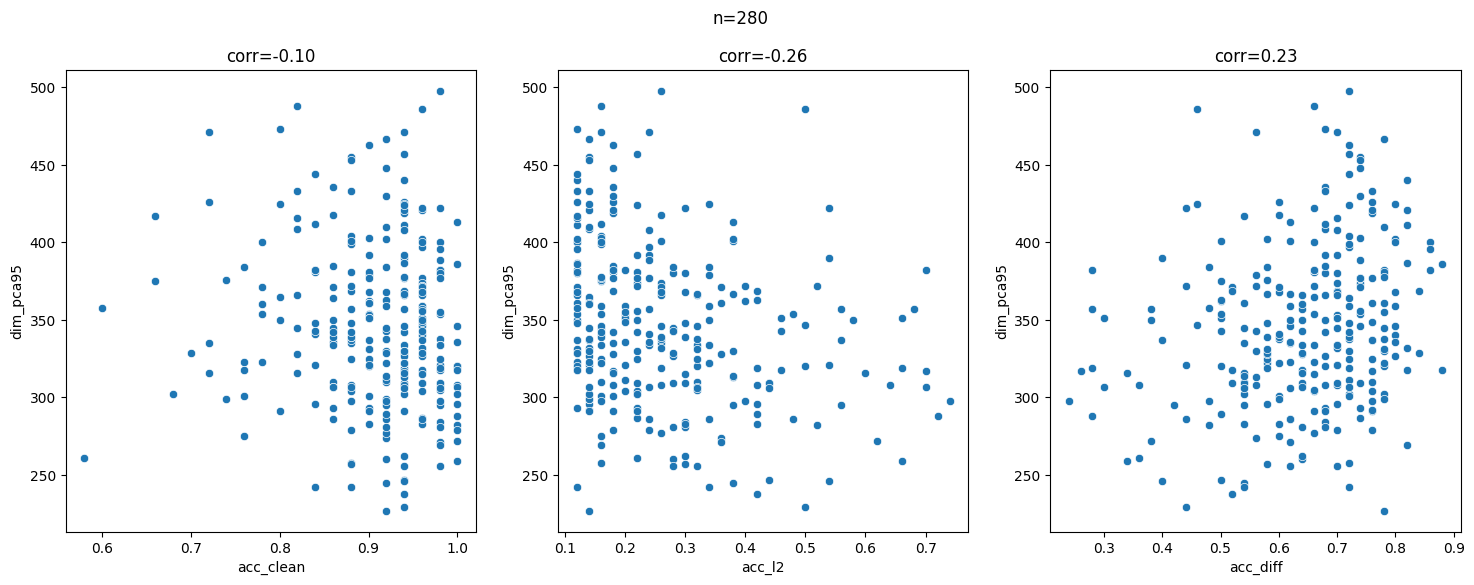

In [90]:
# plot three scatter plots in a row (x: clean acc, y: dim), (x: l2 acc, y: dim), (x: acc_diff, y: dim)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x='acc_clean', y='dim_pca95', data=thresh_df, ax=ax[0])
sns.scatterplot(x='acc_l2', y='dim_pca95', data=thresh_df, ax=ax[1])
sns.scatterplot(x='acc_diff', y='dim_pca95', data=thresh_df, ax=ax[2])
corr_clean = thresh_df['acc_clean'].corr(thresh_df['dim_pca95'])
corr_l2 = thresh_df['acc_l2'].corr(thresh_df['dim_pca95'])
corr_diff = thresh_df['acc_diff'].corr(thresh_df['dim_pca95'])
ax[0].set_title(f'corr={corr_clean:.2f}')
ax[1].set_title(f'corr={corr_l2:.2f}')
ax[2].set_title(f'corr={corr_diff:.2f}')
n = thresh_df.shape[0]
plt.suptitle(f'n={n}')

plt.show()

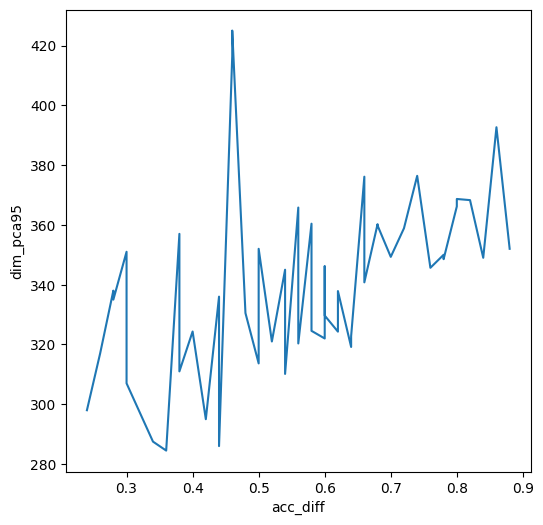

Correlation between acc_diff and dim_pca95: 0.23


In [113]:
# thresh_df = thresh_df.groupby('acc_diff').mean().reset_index()

plt.figure(figsize=(6, 6))
sns.lineplot(x='acc_diff', y='dim_pca95', data=thresh_df, marker=None, err_style='bars', errorbar=None)
plt.show()
r = thresh_df['acc_diff'].corr(thresh_df['dim_pca95'])
print(f'Correlation between acc_diff and dim_pca95: {r:.2f}')